# **Лекция 7: загрузка данных в `numpy` и основы `matplotlib`**

## **План лекции**

- Обсуждение плана лекции
- Установка модулей 
- Загрузка данных в `numpy`
- Сохранение данных в `numpy`
- Визуализация в `matplotlib`
- Простой график
- Подписи осей, шрифты, оформление графика
- Subplots
- Сохранение фигур (если успеем)

# Как устанавливать модули в `python`

Строго говоря, это непростая тема, требующая большого количества уточнений и нюансов. Попробуем описать это коротко и в общих словах!

Грубо говоря, в `python` есть два пакетных менеджера:
- `pip` &ndash; используется для почти всех пакетов
- `conda` &ndash; используется для большинтсва численных/технических пакетов

В каждом пакете используются другие пакеты, которые тоже должны быть установлены. Такие пакеты называются *зависимостями*. В `conda` могут быть одни зависимости, а в `pip` другие, и иногда могут возникать конфликты, котоыре чаще всего решаются переустановкой всего, что стоит. Лучше всего стараться по возможности устанавливать пакеты с помощью только одного из пакетных менеджеров. В нашем случае, множество пакетов уже находится в экосистеме `conda`, поэтому используйте `conda` где это возможно. 

<p>
<details>
<summary> ✨✨ ☝️ <u> Как делать правильнее всего? </u> </summary>

Строго говоря, в сложных проектах (особенно с использованием ML) у вас могут возникнуть конфликты даже внутри `conda`. В таких случаях лучше всего создавать новые `environments` для каждого проекта и ставить все нужные для него пакеты в эти `venv`. Можно почитать подробнее [официальный гайд](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#activating-an-environment).

</details>
</p>

> ☝️ Зачем два пакетных менеджера? Описано [здесь](https://stackoverflow.com/questions/20994716/what-is-the-difference-between-pip-and-conda). Коротко: так сложилось исторически

### Я ничего не понял: какой `pip`, какой `conda`, мне нужно пакет поставить, что мне делать??

Давайте напишем алгоритм:
- Открываем `conda promt` (с помощью поиска по приложением или в `anaconda-navigator`
- Изучаем инструкцию по установке: если есть способ установить через `conda`, копируем строчку установки
    - Если в инструкции этого нет, то убеждаемся что нужный нам пакет есть в `conda` или в `conda-forge` путем гугла
    - Допустим, мы хотим установить `cartopy`: гуглим `conda cartopy`
    - Первая ссылка: https://anaconda.org/conda-forge/cartopy
    - Копируем `conda install conda-forge::cartopy`
- Если пакета нету в `conda`, копируем строчку установки `pip` из инструкции
- Вставляем получившуюся строчку
    - В случае `conda` это выглядит примерно так: `conda install package`
    - В случае `pip` это выглядит примерно так: `pip install package`
- `conda` может очень долго тупить, вплоть до 30 минут, будет писать `Solving environment`
- Скорее всего предложат установить, и скажут что скачается; пишут напишите `y или n`. Пишите `y`

# Загрузка данных в `numpy`

При работе с анализом данных, довольно часто данные хранятся в `txt` файле, который выглядит примерно [так](https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Land_and_Ocean_complete.txt) (еще примеры: [данные по содержанию CO$_2$ в ледяных кернах](https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3-composite-co2-2008-noaa.txt),  [оптические свойства водяного льда](https://www.atmos.washington.edu/ice_optical_constants/)). Какой самый простой способ загрузить его в `python`?

In [5]:
import numpy as np
co2 = np.loadtxt('data/co2-ice-cores-epica-c.txt')
co2

array([[1.37000e+02, 2.80400e+02],
       [2.68000e+02, 2.74900e+02],
       [2.79000e+02, 2.77900e+02],
       ...,
       [7.96467e+05, 1.89300e+02],
       [7.97099e+05, 1.88400e+02],
       [7.98512e+05, 1.91000e+02]])

В самом простом варианте `np.loadtxt` принимает в качестве аргумента путь до файла и возвращает `ndarray`. Очень удобно!

Впрочем, можно заметить что в нашем файле до данных есть много какой-то информации о датасете. Как `numpy` понимает что их нужно пропустить? Обратим внимание, что все эти строчки начинаются с символа `#`: `np.loadtxt` автоматически пропускает все строчки начинающиеся с этого символа.

Что делать, если нужно пропустить какие-то строчки, не начинающиеся с этого символа? Три варианта:
- Дописать `#` в начало нужных строчек
- Стереть эти строчки из файла
- Дописать аргумент `skiprows=`

Посмотрим на последний вариант! Попробуем загрузить слегка модифцированный вариант нашего файла:

In [6]:
co2 = np.loadtxt('data/co2-ice-cores-epica-c-bad.txt')

ValueError: could not convert string 'gas_ageBP' to float64 at row 0, column 1.

Ошибка возникла из-за того, что у нас есть строчка без комментария. Пропустим ровно одну строчку:

In [8]:
co2 = np.loadtxt('data/co2-ice-cores-epica-c-bad.txt', skiprows=1)
co2

array([[1.37000e+02, 2.80400e+02],
       [2.68000e+02, 2.74900e+02],
       [2.79000e+02, 2.77900e+02],
       ...,
       [7.96467e+05, 1.89300e+02],
       [7.97099e+05, 1.88400e+02],
       [7.98512e+05, 1.91000e+02]])

Другие полезные приколы:
- `encoding='utf8'` позволяет считывать файлы в заданной кодировке (обычно не очень актуально)
- `delimeter=` позволяет считывать данные, которые разделены чем-то кроме пробелов (например запятыми)
- `unpack=True` позволяет записывать данные в переменные, равные количеству столбцов в данных. Пример:

In [15]:
time_kyr, co2_ppm = np.loadtxt('data/co2-ice-cores-epica-c-bad.txt', skiprows=1, unpack=True)
time_kyr, co2_ppm

(array([1.37000e+02, 2.68000e+02, 2.79000e+02, ..., 7.96467e+05,
        7.97099e+05, 7.98512e+05]),
 array([280.4, 274.9, 277.9, ..., 189.3, 188.4, 191. ]))

# Сохранение данных

Очень похожим образом можно сохранять данные:

In [11]:
np.savetxt('data/co2-ice-cores-epica-c-copy.txt', co2)

Второй аргумент &ndash; матрица, которую мы хотим записать в файл. Что делать, если у нас нет матрицы, а есть, скажем, два вектора?

In [12]:
tmp = np.zeros((len(time_kyr), 2))
tmp[:, 0] = time_kyr
tmp[:, 1] = co2_ppm
np.savetxt('data/co2-ice-cores-epica-c-copy.txt', tmp)

Другие полезные фичи:
- `delimeter=` позволяет записывать данные с другим разделителем (не пробелом)
- `header=` позволяет записать в начало файла строчку с комментарием (например, названия столбцов)

# Визуализация и `matplotlib`

Наконец-то мы подошли к самой любимой вещи: картинкам! Давайте импортируем нужный нам модуль:

In [13]:
import matplotlib.pyplot as plt

Нарисуем простенький график:

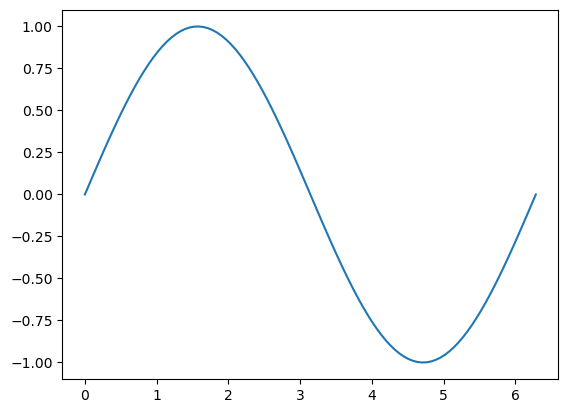

In [18]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)

**Внимание вопрос: что не так с этим графиком?**

<p>
<details>
<summary> ⬇️ <u> Ответ </u> </summary>

- Не подписаны оси
- Не описано что изображено на графике
- Размер картинки маловат

</details>
</p>

Начнем с последнего: с размера фигуры (холста для графика). Когда мы пишем `plt.plot`, автоматически создается объект фигуры, на котором рисуется график. Если мы создадим его своими руками, то сможем контроллировать его размер (и другие параметры):

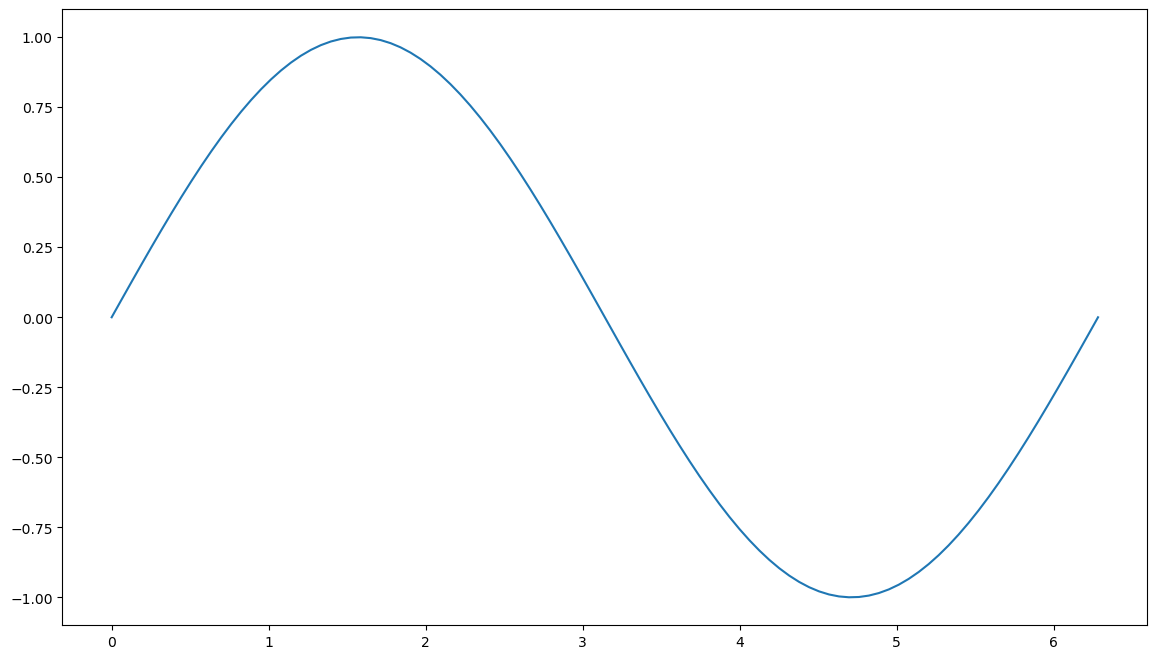

In [21]:
plt.figure(figsize=(14,8)) # удобный размер зависит от настроек экрана и увелечения в браузере
                           # обычно я предпочитаю figsize=(16,9)
plt.plot(x, y)

Теперь подпишем оси и сам график:

Text(0.5, 1.0, 'График синуса')

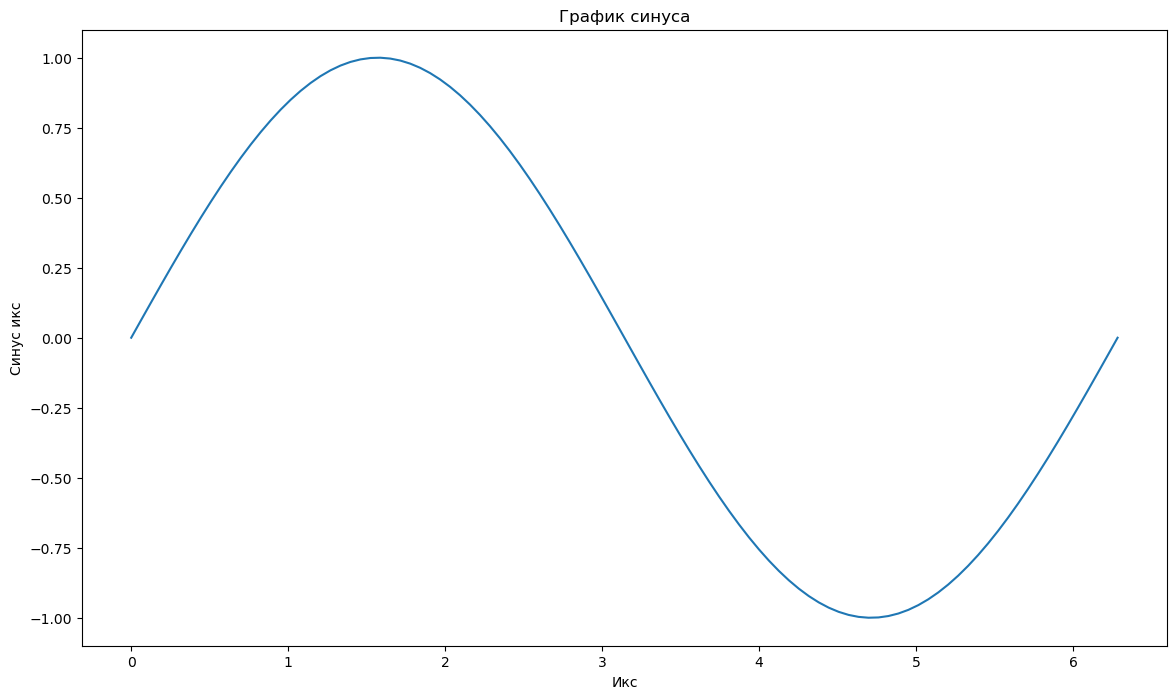

In [24]:
plt.figure(figsize=(14,8)) # удобный размер зависит от настроек экрана и увелечения в браузере
                           # обычно я предпочитаю figsize=(16,9)
plt.plot(x, y)
plt.xlabel('Икс')
plt.ylabel('Синус икс')
plt.title('График синуса')


**Внимание вопрос 2: а с этим графиком что не так?**

<p>
<details>
<summary> ⬇️ <u> Ответ </u> </summary>

- Маленький размер шрифта подписей
- Маленькие цифры по осям

</details>
</p>

Начнем с простого:

Text(0.5, 1.0, 'График синуса')

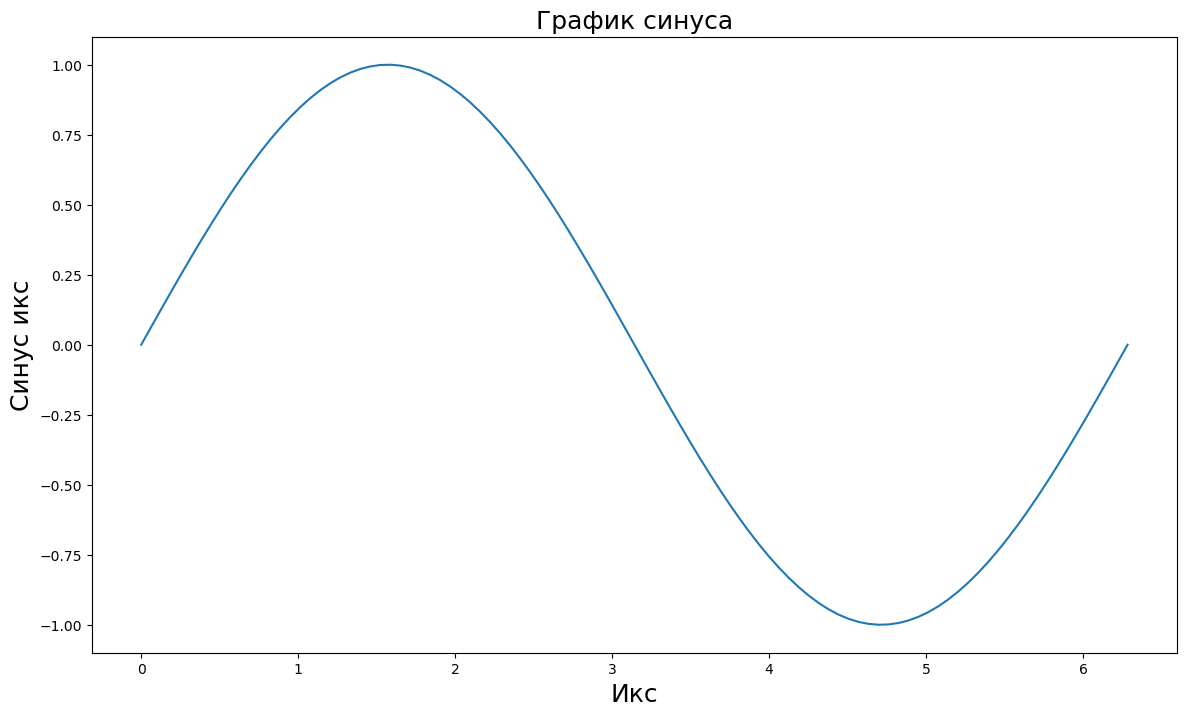

In [29]:
plt.figure(figsize=(14,8)) 

plt.plot(x, y)
plt.xlabel('Икс', fontsize=18)
plt.ylabel('Синус икс', fontsize=18)
plt.title('График синуса', fontsize=18)


А вот размер цифр по осям изменить уже сложнее. Напишем магическую строчку:

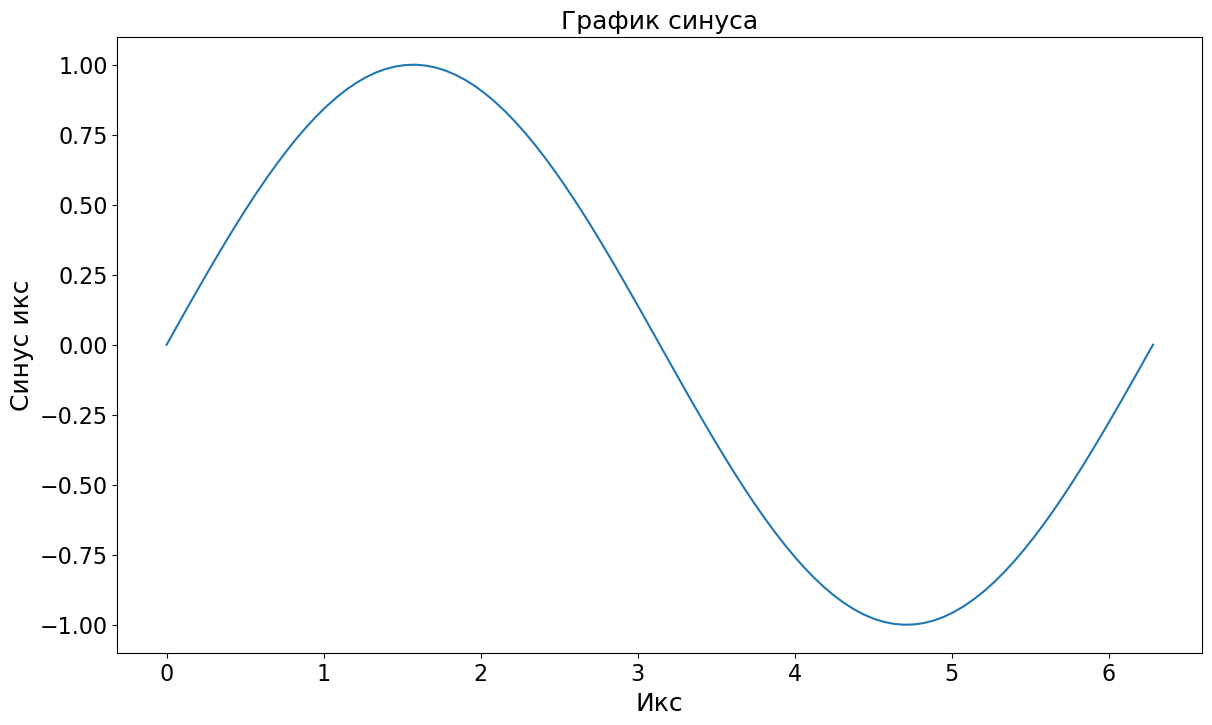

In [30]:
plt.figure(figsize=(14,8)) 

plt.plot(x, y)
plt.xlabel('Икс', fontsize=18)
plt.ylabel('Синус икс', fontsize=18)
plt.title('График синуса', fontsize=18)

ax=plt.gca()
ax.tick_params(labelsize=16) 

### А что если я хочу нарисовать два графика на одной фигуре?

Подгенерим простенькие данные:

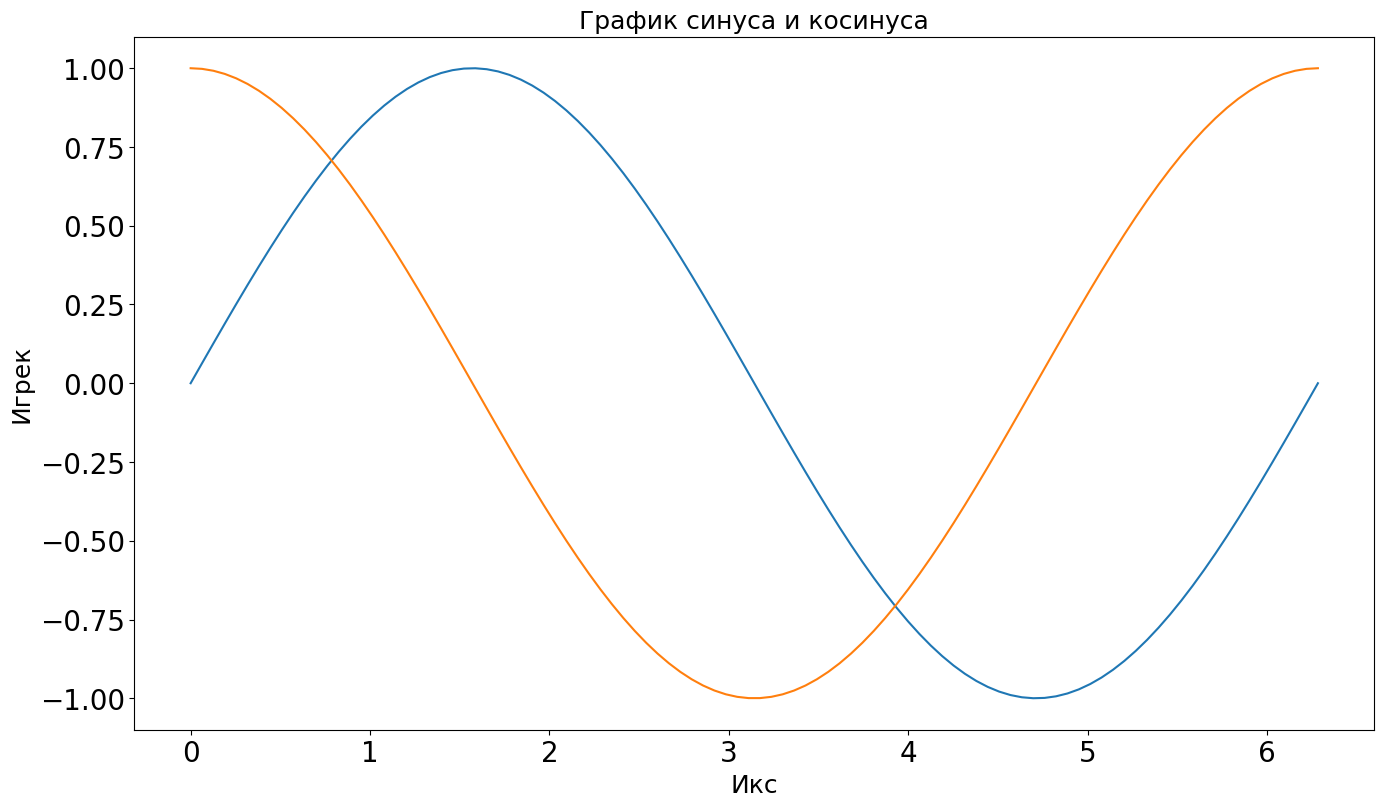

In [40]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(16,9))
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel('Икс', fontsize=18)
plt.ylabel('Игрек', fontsize=18)
plt.title('График синуса и косинуса', fontsize=18)
plt.gca().tick_params(labelsize=20)

**Внимание вопрос 3: и с этим графиком что-то не так?**

Поправим:

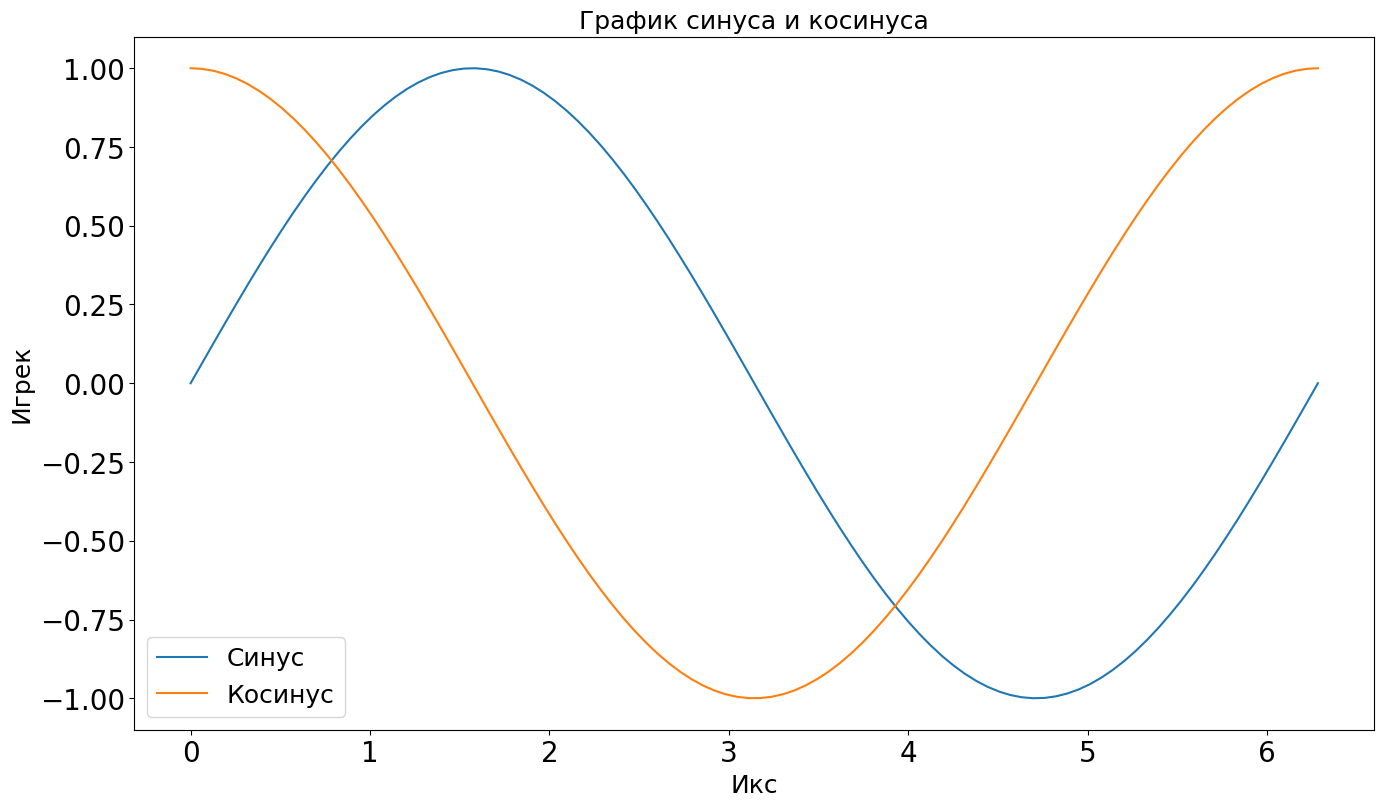

In [43]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(16,9))
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel('Икс', fontsize=18)
plt.ylabel('Игрек', fontsize=18)
plt.title('График синуса и косинуса', fontsize=18)
plt.legend(['Синус', 'Косинус'], fontsize=18)
plt.gca().tick_params(labelsize=20)

Другой вариант:

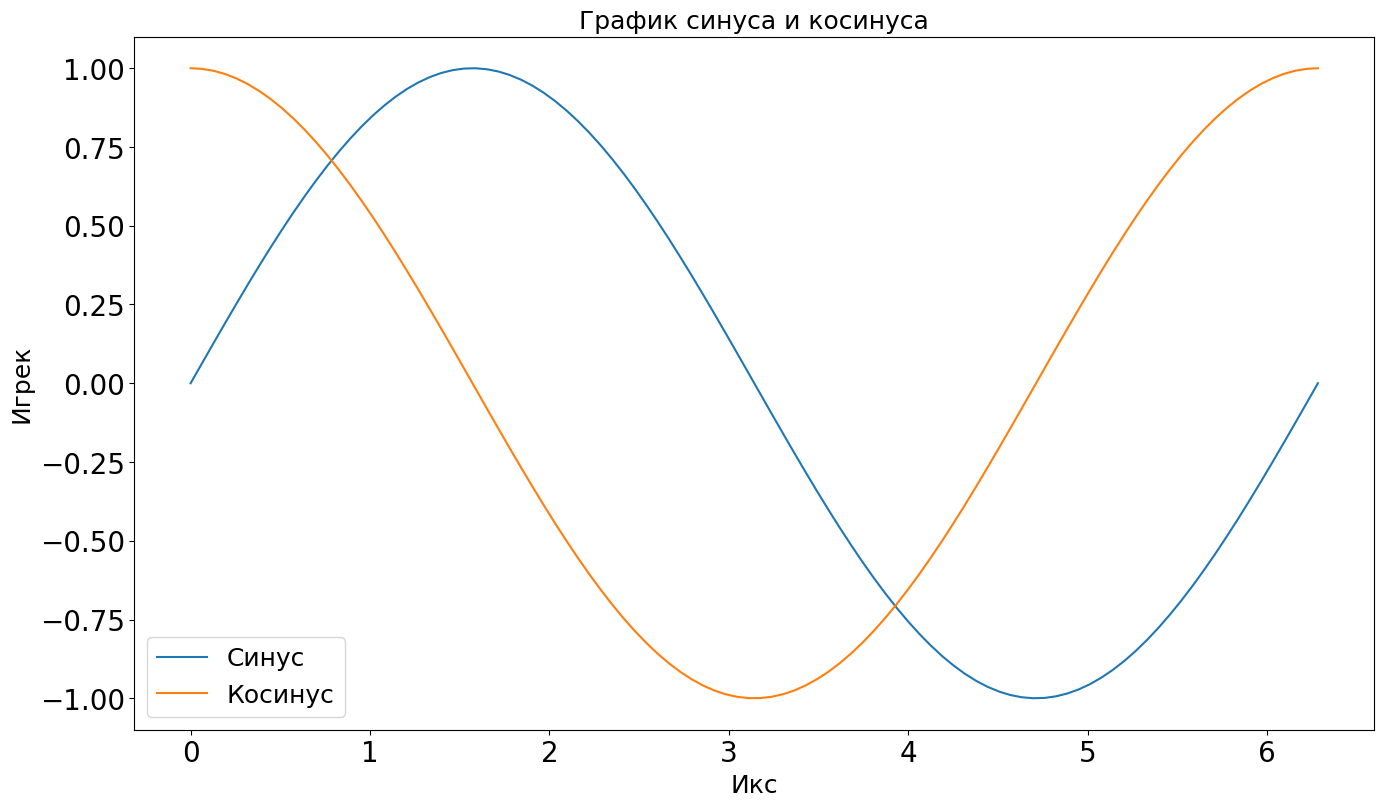

In [45]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(16,9))
plt.plot(x, y1, label='Синус')
plt.plot(x, y2, label='Косинус')
plt.xlabel('Икс', fontsize=18)
plt.ylabel('Игрек', fontsize=18)
plt.title('График синуса и косинуса', fontsize=18)
plt.legend(fontsize=18)
plt.gca().tick_params(labelsize=20)

### Посмотрим на другой пример

Студент прогулял лабораторную работу по физике и решил сгенрировать данные для лабы. Поможем:

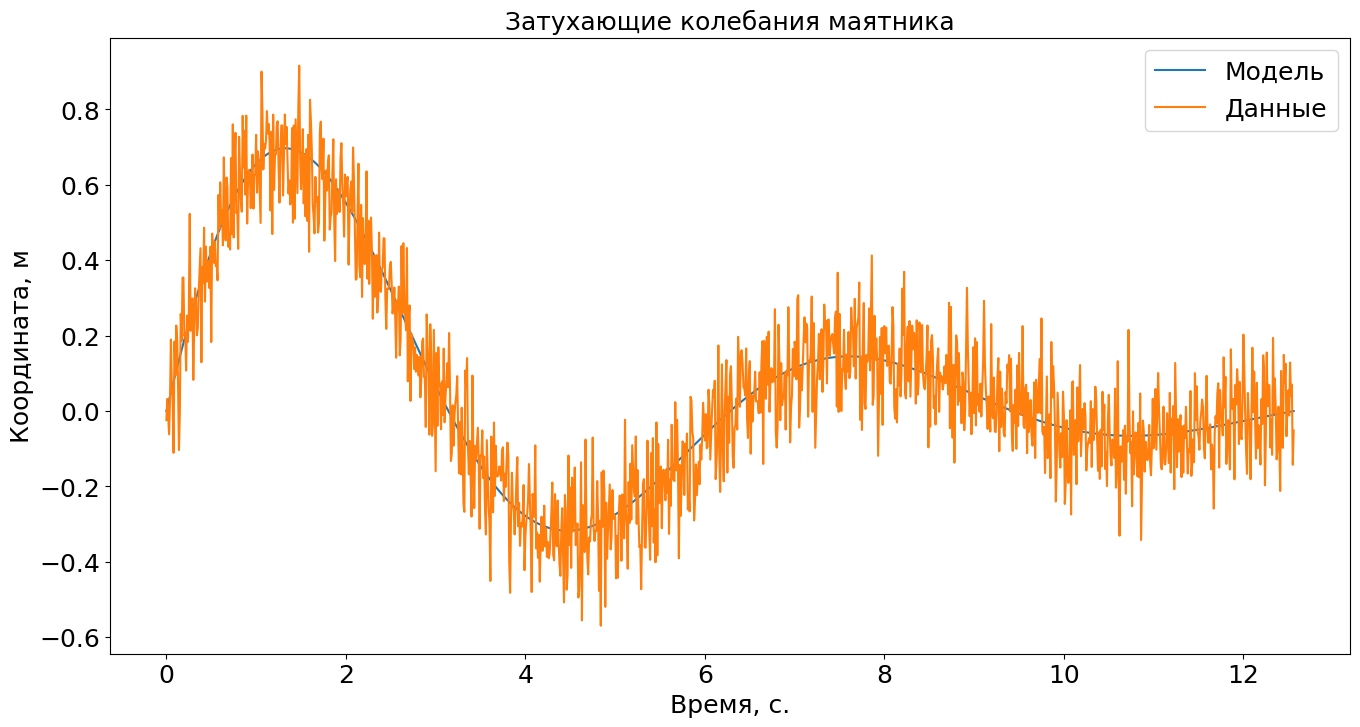

In [48]:
x = np.arange(0, 4*np.pi, 0.01)
y = np.sin(x)*np.exp(-x/4)

y1 = y + 0.1*np.random.randn(len(y)) # добавляем шум

plt.figure(figsize=(16,8))
plt.plot(x, y)
plt.plot(x, y1)

plt.title('Затухающие колебания маятника', fontsize=18) 
plt.ylabel('Координата, м', fontsize=18)     
plt.xlabel('Время, с.',fontsize=18)           
plt.legend(['Модель', 'Данные'], fontsize=18) 
ax=plt.gca()
ax.tick_params(labelsize=18) 
plt.show()

Вы когда нибудь видели, чтобы позицию маятника с такой частотой измеряли? То-то же:

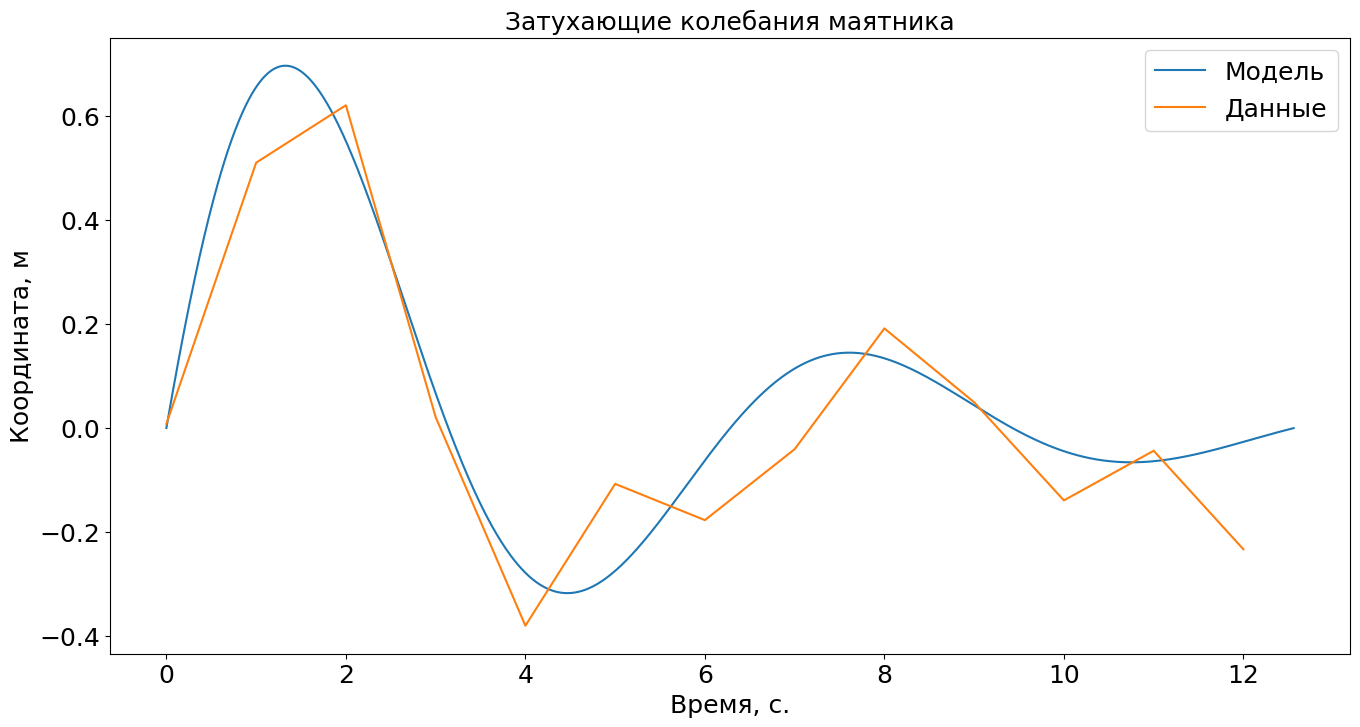

In [49]:
x = np.arange(0, 4*np.pi, 0.01)
y = np.sin(x)*np.exp(-x/4)

y1 = y + 0.1*np.random.randn(len(y)) # добавляем шум

plt.figure(figsize=(16,8))
plt.plot(x, y)
plt.plot(x[::100], y1[::100])

plt.title('Затухающие колебания маятника', fontsize=18) 
plt.ylabel('Координата, м', fontsize=18)     
plt.xlabel('Время, с.',fontsize=18)           
plt.legend(['Модель', 'Данные'], fontsize=18) 
ax=plt.gca()
ax.tick_params(labelsize=18) 
plt.show()

Теперь сделаем это точками:

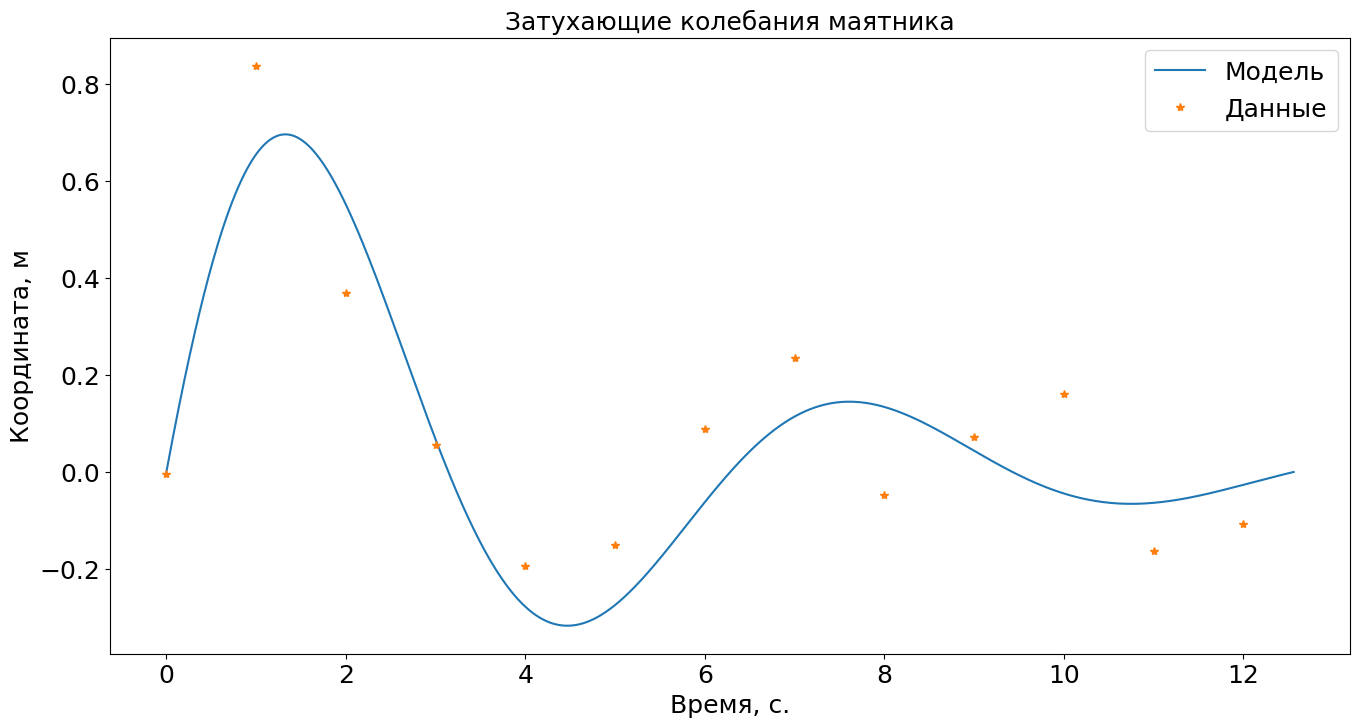

In [53]:
x = np.arange(0, 4*np.pi, 0.01)
y = np.sin(x)*np.exp(-x/4)

y1 = y + 0.1*np.random.randn(len(y)) # добавляем шум

plt.figure(figsize=(16,8))
plt.plot(x, y)
plt.plot(x[::100], y1[::100], '*')

plt.title('Затухающие колебания маятника', fontsize=18) 
plt.ylabel('Координата, м', fontsize=18)     
plt.xlabel('Время, с.',fontsize=18)           
plt.legend(['Модель', 'Данные'], fontsize=18) 
ax=plt.gca()
ax.tick_params(labelsize=18) 
plt.show()

## Subplots

Очень часто нужно построить график с несколькими панелями (subplot). Это можно сделать используя конструкцию `plt.subplots`, но есть нюанс. Придется немного погрузится в нюансы `matplotlib`-а!

На самом деле, `plt.figure()` создает несколько объектов. Это `fig` и `ax`: холст и рамка для графика и разные оси. Если мы строим один график, то у нас один объект `ax`, если несколько, то вернется список. Все функции вида `plt.xlabel` это некая обертка обращения к осям, и в реальности там немного другой синтаксис. Посмотрим на то, как мы бы записали предыдущие примеры используя данную конструкцию:

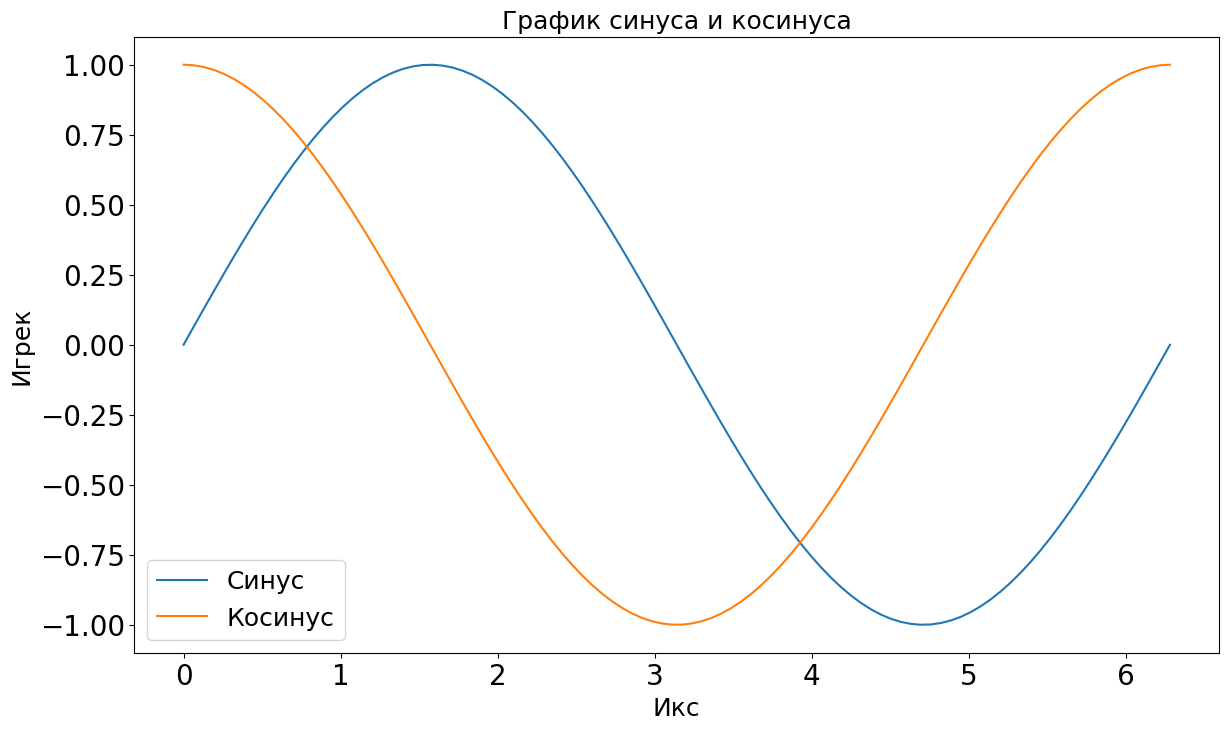

In [70]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots(figsize=(14,8)) # здесь мы используем subplots, а не figure
ax.plot(x, y1, label='Синус')
ax.plot(x, y2, label='Косинус')
ax.set_xlabel('Икс', fontsize=18) # обратите внимание: не xlabel 
ax.set_ylabel('Игрек', fontsize=18)
ax.set_title('График синуса и косинуса', fontsize=18)
ax.legend(fontsize=18)
ax.tick_params(labelsize=20)

Давайте теперь построим графики на разных рисунках:

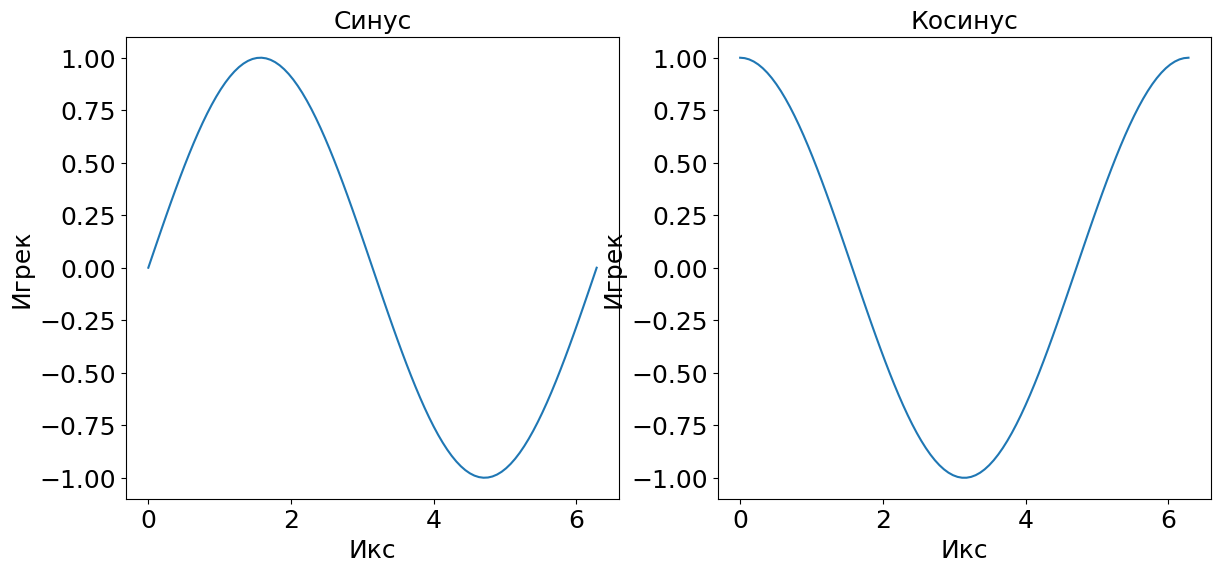

In [82]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots(1, 2, figsize=(14,6)) # здесь мы используем subplots, а не figure
ax[0].plot(x, y1)
ax[0].set_title('Синус', fontsize=18) # обратите внимание: не title, а set_title

ax[1].plot(x, y2)
ax[1].set_title('Косинус', fontsize=18)

for i in range(2):
    ax[i].set_xlabel('Икс', fontsize=18) 
    ax[i].set_ylabel('Игрек', fontsize=18)
    ax[i].tick_params(labelsize=18)

Опа, игрек наезжает на другой график. Что делать?

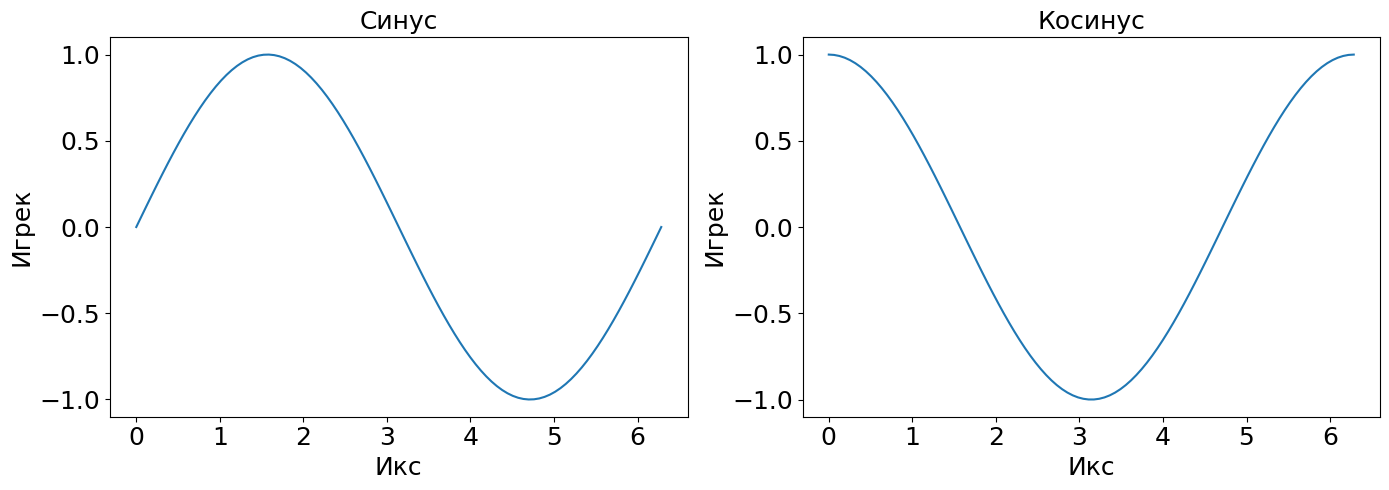

In [83]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots(1, 2, figsize=(14,5)) 
ax[0].plot(x, y1)
ax[0].set_title('Синус', fontsize=18)

ax[1].plot(x, y2)
ax[1].set_title('Косинус', fontsize=18)

for i in range(2):
    ax[i].set_xlabel('Икс', fontsize=18) # обратите внимание: не xlabel 
    ax[i].set_ylabel('Игрек', fontsize=18)
    ax[i].tick_params(labelsize=18)
    
plt.tight_layout() # добавили магическую строчку

# Сохранение фигур (и приколы с этим связанные)

Конечно, можно просто скопировать картинку и потом ее вставить. Это хорошо, но не подходит для статей, отчетов и чего-либо более-менее серьезного. Давайте посмотрим как сохранять картинки, и на что стоит обратить внимание:

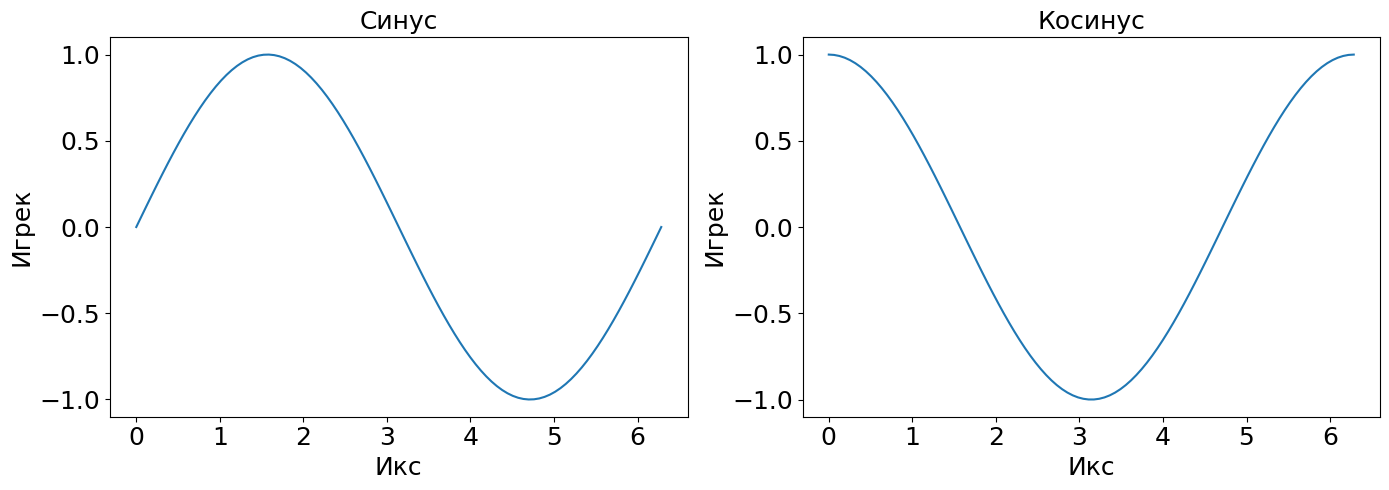

In [84]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots(1, 2, figsize=(14,5)) 
ax[0].plot(x, y1)
ax[0].set_title('Синус', fontsize=18)

ax[1].plot(x, y2)
ax[1].set_title('Косинус', fontsize=18)

for i in range(2):
    ax[i].set_xlabel('Икс', fontsize=18) # обратите внимание: не xlabel 
    ax[i].set_ylabel('Игрек', fontsize=18)
    ax[i].tick_params(labelsize=18)
    
plt.tight_layout() # добавили магическую строчку

plt.savefig('figures/example1.png')

Что еще стоит добавить:
- аргумент `dpi=300` позволяет сохранять графики в более-менее хорошем качестве
- стоит проверить, ничего ли не слетает в процессе; если что-то слетает попробовать починить с помощью `plt.tight_layout()`
- стоит сохранять копию картинки в векторе (`.eps`) 

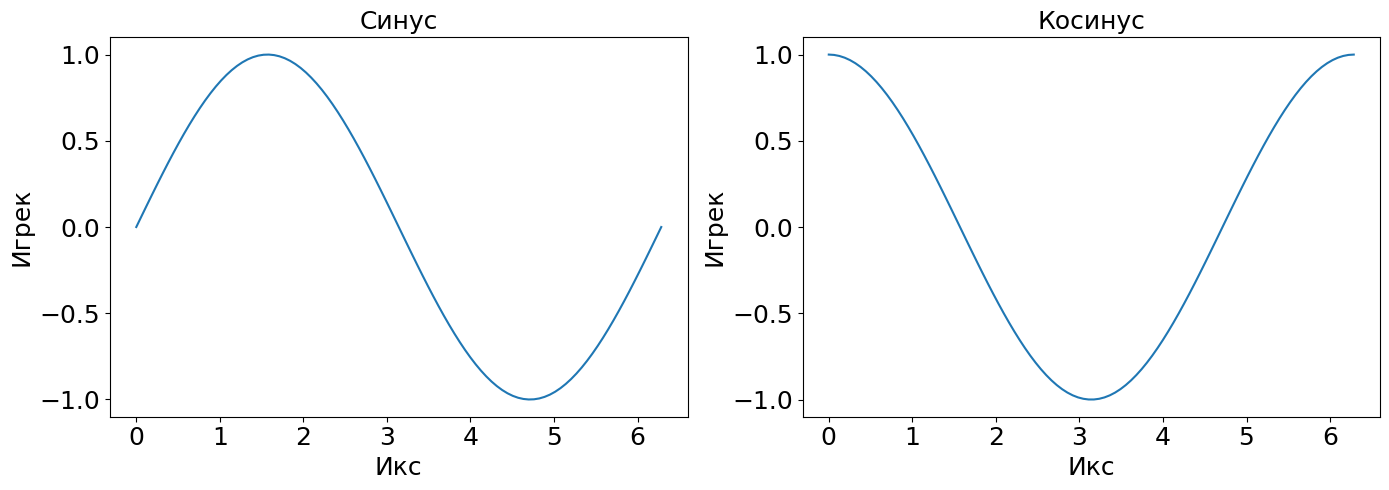

In [85]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots(1, 2, figsize=(14,5)) 
ax[0].plot(x, y1)
ax[0].set_title('Синус', fontsize=18)

ax[1].plot(x, y2)
ax[1].set_title('Косинус', fontsize=18)

for i in range(2):
    ax[i].set_xlabel('Икс', fontsize=18) 
    ax[i].set_ylabel('Игрек', fontsize=18)
    ax[i].tick_params(labelsize=18)
    
plt.tight_layout() 

plt.savefig('figures/example1.png', dpi=300)
plt.savefig('figures/example1.eps')